# Part 6: Ranking version of the problem

Two primary ways in which a recommendation problem may be formulated are:
1. Prediction version of problem: Predict the rating value for a user-item combination
2. Ranking version of problem: Recommend the top k items for a particular user

In previous parts of the project, we have explored collaborative filtering tech-
niques for solving the prediction version of the problem. In this part, we will
explore techniques for solving the ranking version of the problem.

The main idea of the second approach is that it is possible to rank all the items
using the predicted ratings. The ranking can be done in the following manner:
* For each user, compute it's predicted ratings for all the items using one of the collaborative filtering techniques. Store the predicted ratings as a list L.
* Sort the list in descending order, the item with the highest predicted ratings appears first and the item with the lowest predicted ratings appears last.
* Select the first t-items from the sorted list to recommend to the user.

Precision-recall curve can be used to evaluate the relevance of the ranked list.
Before stating the expressions for precision and recall in the context of ranking,
let's introduce some notation:
S(t) : The set of items of size t recommended to the user. In this recom-
mended set, ignore (drop) the items for which we don't have a ground truth
rating.
G: The set of items liked by the user (ground-truth positives)

Precision is the proportion of recommendations that are good recommendations, and recall is the
proportion of good recommendations that appear in top recommendations.

**Plot average precision (Y-axis) against t (X-axis) for the rank-
ing obtained using k-NN, NMF, MF with bias collaborative filter predictions. Also, plot the average
recall (Y-axis) against t (X-axis) and average precision (Y-axis) against average
recall (X-axis). Use the k=23 and sweep t from 1 to 25 in step
sizes of 1. For each plot, briefly comment on the shape of the plot.**

## Importing libraries

In [1]:
from surprise import BaselineOnly

from surprise import Dataset

from surprise import Reader

from surprise.model_selection import cross_validate

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import surprise

from surprise import accuracy

from collections import defaultdict

from surprise import Dataset

from surprise import SVD

from surprise.model_selection import KFold

## Evaluating ranking function using precision recall curve

In [2]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)

    for uid, _, true_r, est, _ in predictions:

        user_est_true[uid].append((est, true_r))

    precisions = dict()

    recalls = dict()

    for uid, user_ratings in user_est_true.items():

        user_ratings.sort(key=lambda x: x[0], reverse=True)

        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold)) for (est, true_r) in user_ratings[:k])

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls


## Getting data

In [3]:
import sys, os  



ratings = pd.read_csv('ratings.csv')

if not os.path.exists('results/Q36-39'):

    os.makedirs('results/Q36-39')

reader = Reader(rating_scale=(1, 5))

data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

ratings = ratings.as_matrix()

C:\Users\Omkar Mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


## Plot function

In [4]:
def plot(x,y,x_label,y_label,train):

    plt.plot(x,y)

    plt.xlabel(x_label)

    plt.ylabel(y_label)

    plt.title(y_label+" vs "+x_label +"|"+train)

    plt.savefig("Ratings:"+ x_label +" vs "+y_label+"|"+train+".png")
    
    plt.show()

    plt.close()

## KNN 

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

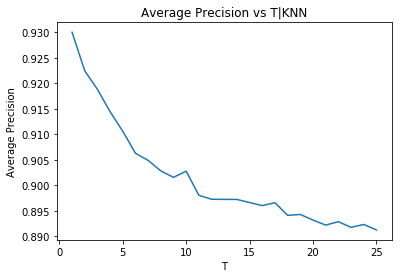

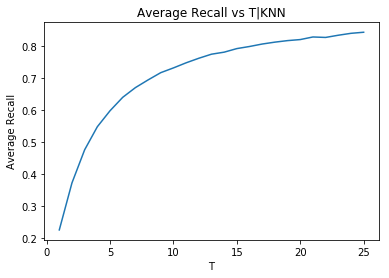

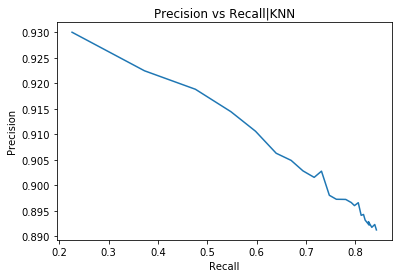

In [5]:
#use the best k

k = 23

precision = list()

recall = list()

for t in range(1,26,1):

    kf = KFold(n_splits=10)

    knn = surprise.prediction_algorithms.knns.KNNBasic(k=k, min_k=1, sim_options={'name': 'pearson'})

    temp_p = list()

    temp_r = list()

    test_user = list()

    for trainset, testset in kf.split(data):

        knn.fit(trainset)

        predictions = knn.test(testset)

        precisions, recalls = precision_recall_at_k(predictions, k=t, threshold=3)

        # Precision and recall is averaged over all users

        temp_p.append(sum(prec for prec in precisions.values()) / len(precisions))

        temp_r.append(sum(rec for rec in recalls.values()) / len(recalls))

        

    precision.append(np.average(temp_p))

    recall.append(np.average(temp_r))

    

t = range(1,26,1)

plot(t,precision,"T","Average Precision","KNN")

plot(t,recall,"T","Average Recall","KNN")

plot(recall,precision,"Recall","Precision","KNN")

## NMF

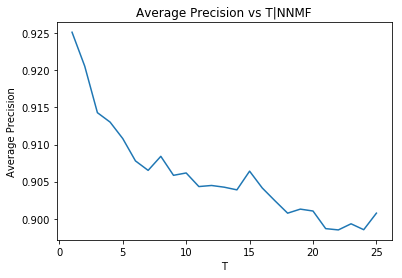

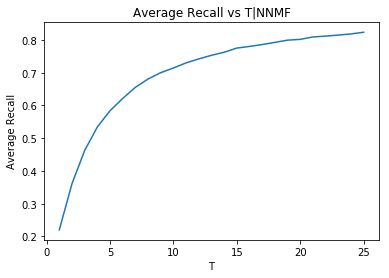

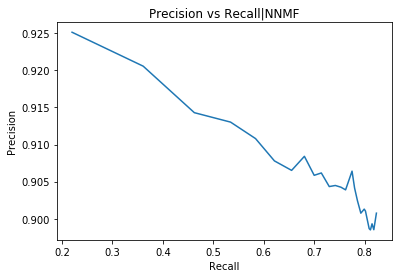

In [6]:
k = 17

n_precision = list()

n_recall = list()

for t in range(1,26,1):

    kf = KFold(n_splits=10)

    knn = surprise.prediction_algorithms.matrix_factorization.NMF(n_factors = k)

    temp_p = list()

    temp_r = list()

    test_user = list()

    for trainset, testset in kf.split(data):

        knn.fit(trainset)

        predictions = knn.test(testset)

        precisions, recalls = precision_recall_at_k(predictions, k=t, threshold=3)

        # Precision and recall is averaged over all users

        temp_p.append(sum(prec for prec in precisions.values()) / len(precisions))

        temp_r.append(sum(rec for rec in recalls.values()) / len(recalls))

        

    n_precision.append(np.average(temp_p))

    n_recall.append(np.average(temp_r))

    

t = range(1,26,1)

plot(t,n_precision,"T","Average Precision","NNMF")

plot(t,n_recall,"T","Average Recall","NNMF")

plot(n_recall,n_precision,"Recall","Precision","NNMF")

## MF with bias

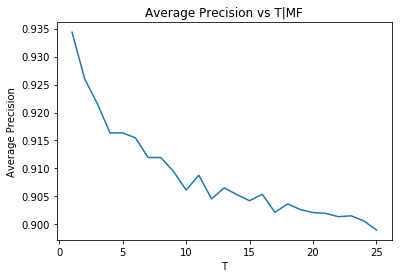

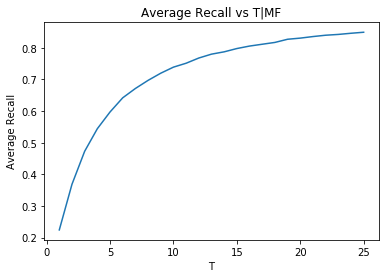

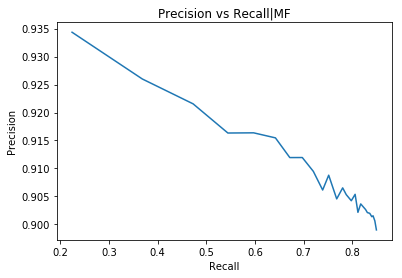

In [7]:
k = 12

m_precision = list()

m_recall = list()

for t in range(1,26,1):

    kf = KFold(n_splits=10)

    knn = surprise.prediction_algorithms.matrix_factorization.SVD(n_factors = k)

    temp_p = list()

    temp_r = list()

    test_user = list()

    for trainset, testset in kf.split(data):

        knn.fit(trainset)

        predictions = knn.test(testset)

        precisions, recalls = precision_recall_at_k(predictions, k=t, threshold=3)

        # Precision and recall is averaged over all users

        temp_p.append(sum(prec for prec in precisions.values()) / len(precisions))

        temp_r.append(sum(rec for rec in recalls.values()) / len(recalls))

        

    m_precision.append(np.average(temp_p))

    m_recall.append(np.average(temp_r))

    

t = range(1,26,1)

plot(t,m_precision,"T","Average Precision","MF")

plot(t,m_recall,"T","Average Recall","MF")

plot(m_recall,m_precision,"Recall","Precision","MF")





## Comparing Precision vs Recall for all collaborative filtering algorithms

In [8]:
plt.plot(recall,precision, label = "KNN")

plt.plot(n_recall,n_precision, label = "NNMF")

plt.plot(m_recall,m_precision, label = "MF")

plt.xlabel("Recall")

plt.ylabel("Precision")

plt.title("Comparision of Precision vs Recall")

plt.legend()

plt.savefig("All_PvsR_.png")

plt.close()



**As we can see from the graph, MF with bias outperforms both k-NN and NNMF, because its
average precision is always higher than the other two. This, conforms to the average RMSE,
MAE, and the AUC of the ROC plots we presented above.**